<a href="https://colab.research.google.com/github/shubham121c/guvi-final-project/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer conversion perdiction-project (shubham chavan- shubham121c@gmail.com)


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp

df = pd.read_csv('/content/Customer Conversion Prediction - Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


EDA-to understand patternts in the data

In [77]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [78]:
df.shape


(45211, 11)

Finding out unique values in all the columns

In [79]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['day'].unique())
print(df['num_calls'].unique())
print(df['prev_outcome'].unique())
print(df['mon'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
['unknown' 'failure' 'other' 'success']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [80]:
df.dtypes


age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [81]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

no null values in our data

df.plot(x='age', y='num_calls', style='o')
plt.title('age vs outcome')
plt.xlabel('age')
plt.ylabel('outcome')
plt.show()

Finding out number of yes and no in the target column

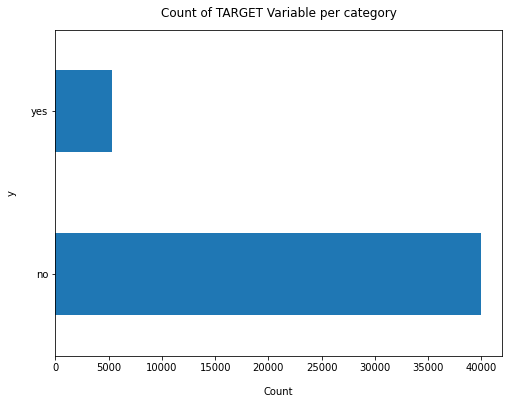

In [82]:
df['y'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("y", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [83]:
df['y'].value_counts()


no     39922
yes     5289
Name: y, dtype: int64

In [84]:
100*df['y'].value_counts()/len(df['y'])


no     88.30152
yes    11.69848
Name: y, dtype: float64

Therefore we can see around 12% traget is actully converted into the customers
the data looks imbalanced we might need to use imbalnced lerning techninques 

Univarient and bivarient analysis 

In [85]:
pd.crosstab(df['job'],df['y'])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


target group having blue collar, management, technician, admin and service jobs are the major group of people who subscribe to the service

Text(0, 0.5, 'Percent')

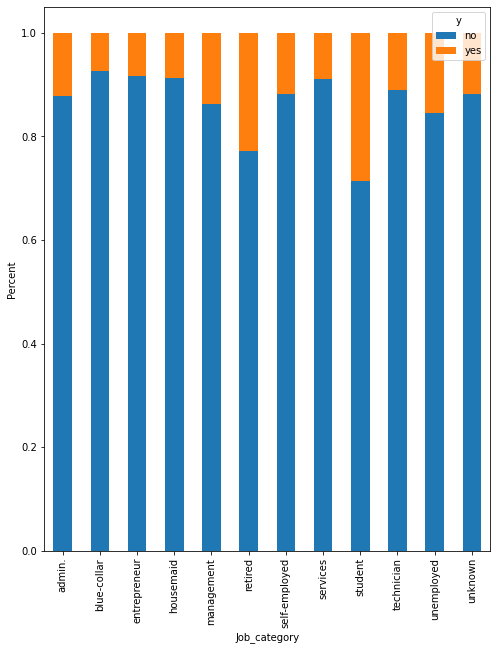

In [87]:
job=pd.crosstab(df['job'],df['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,10))
plt.xlabel('Job_category')
plt.ylabel('Percent')

surpringly retired and student targets are the one who suscribed to service

In [88]:
df['y'].replace('no', 0,inplace=True)
df['y'].replace('yes', 1,inplace=True)

<AxesSubplot:>

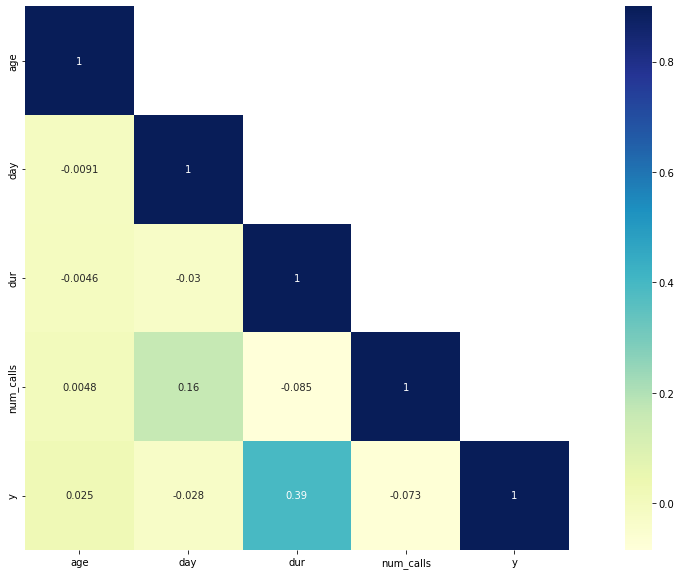

In [89]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

duration feature has most affect on target

In [90]:
import seaborn as sns

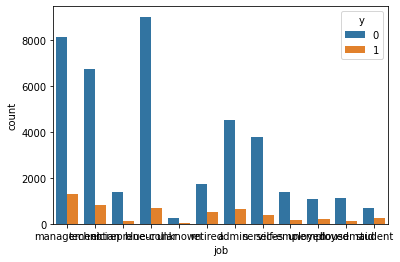

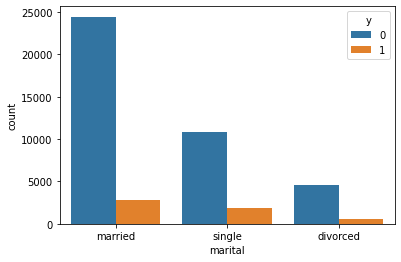

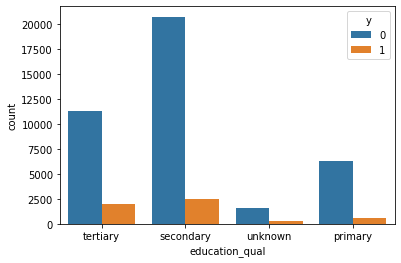

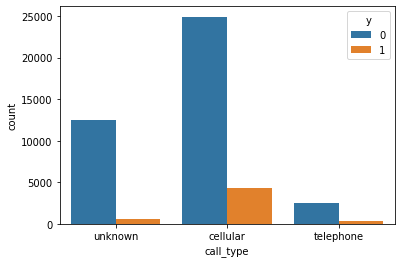

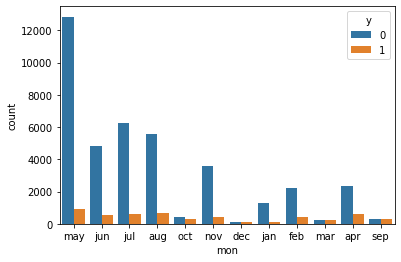

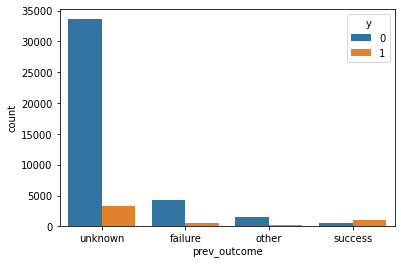

In [91]:
for i, predictor in enumerate(df.drop(columns=['y', 'age', 'num_calls','day','dur'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='y')

understanding the relationship between features and targets

encoding the categorical data

In [92]:
final=pd.get_dummies(df,drop_first=True)
final

,age,day,dur,num_calls,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,5,76,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,5,92,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,17,456,2,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
45208,72,17,1127,5,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
45209,57,17,508,4,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [93]:
final.shape

(45211, 37)

modelling using random forest

In [194]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [98]:
x= final.drop('y',axis=1)
x

,age,day,dur,num_calls,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,5,76,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,5,92,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,17,456,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,17,1127,5,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,17,508,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [99]:
y=final['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [101]:
from sklearn.ensemble import RandomForestClassifier


In [102]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [103]:
model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [104]:
a=y_pred=model_rf.predict(x_test)
a



array([0, 0, 0, ..., 0, 0, 0])

In [105]:
classification_report(y_test, y_pred, labels=[0,1])


'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94      7980\n           1       0.77      0.14      0.23      1063\n\n    accuracy                           0.89      9043\n   macro avg       0.83      0.57      0.59      9043\nweighted avg       0.88      0.89      0.86      9043\n'

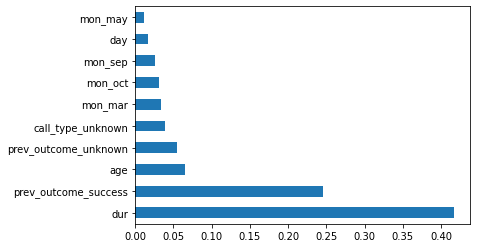

In [106]:
feat_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

duration, previous outcome_sucess and age are three imporatant features 

In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
auc = roc_auc_score(y_test, y_pred)
auc

0.5659166731504207

Confusion matrix:
 [[7936   44]
 [ 917  146]]


<ipython-input-110-8aeae4f6eca9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-110-8aeae4f6eca9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


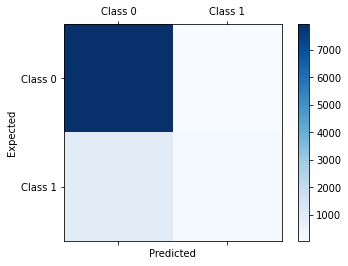

In [110]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

AUROC value is very less,and from confusion matrix it is very clear that the model is predicting class 0  correctly on majority of timer and class one very less than expecteds so trying other *models* for better prediction and auroc

using clusterd centroded undersampling and SMOTE oversampling technique to balance the imbalanced data

In [112]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import imblearn

In [126]:
from matplotlib import pyplot as plt

In [130]:
from imblearn.combine import SMOTEENN


In [131]:
smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x, y)


In [132]:
x_smt

,age,day,dur,num_calls,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,33,5,76,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,47,5,92,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,35,5,139,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,58,5,50,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,43,5,55,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63405,35,4,337,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63406,33,9,161,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
63407,34,10,377,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63408,29,17,1317,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
y_smt

0        0
1        0
2        0
3        0
4        0
        ..
63405    1
63406    1
63407    1
63408    1
63409    1
Name: y, Length: 63410, dtype: int64

In [201]:
from sklearn.metrics import roc_auc_score

using random forset with balanced data

In [135]:
model_rf_2=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [136]:
model_rf_2.fit(x_smt,y_smt)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [141]:
y_pred_2=model_rf_2.predict(x_test)

In [142]:
y_pred_2

array([0, 0, 1, ..., 0, 0, 0])

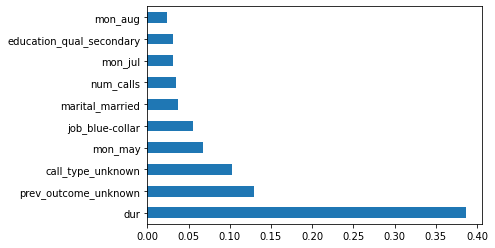

In [139]:
feat_importances = pd.Series(model_rf_2.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [143]:
auc_2 = roc_auc_score(y_test, y_pred_2)
auc_2

0.8298941733449334

Confusion matrix:
 [[6211 1769]
 [ 126  937]]


<ipython-input-144-e010f0824af7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-144-e010f0824af7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


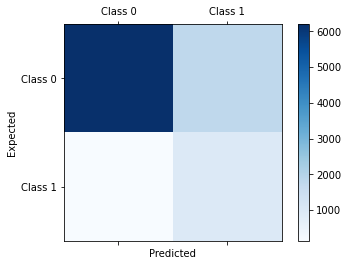

In [144]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

we get better auroc value of ~83%

using KNN algorthim with balanced data

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
KNC = KNeighborsClassifier()
KNC.fit(x_smt,y_smt)
KNeighborsClassifier()


KNeighborsClassifier()

In [151]:
K_pred = KNC.predict(x_test)

In [153]:
K_pred

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
auc_3 = roc_auc_score(y_test, K_pred)
auc_3

0.8474548907546382

Confusion matrix:
 [[5673 2307]
 [  17 1046]]


<ipython-input-155-59431d63c316>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-155-59431d63c316>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


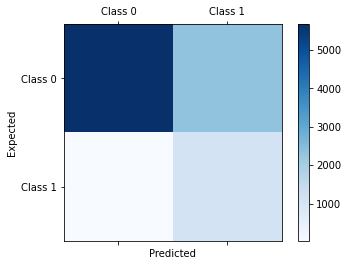

In [155]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=K_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

we get auroc value 84% so knn is better model

now using KNN model using top 3 features

In [156]:
target=final['y']


In [161]:
feature=final[['age','dur','prev_outcome_other',	'prev_outcome_success','prev_outcome_unknown']]

In [173]:
x_train1,x_test1,y_train1,y_test1=train_test_split(feature,target,test_size=0.2)


In [183]:
smt_2 = SMOTEENN(sampling_strategy='all')
feature_smt, target_smt = smt_2.fit_resample(feature, target)

In [184]:
feature_smt

,age,dur,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,44,151,0,0,1
1,33,76,0,0,1
2,47,92,0,0,1
3,33,198,0,0,1
4,35,139,0,0,1
...,...,...,...,...,...
57328,23,406,0,0,0
57329,26,323,0,0,0
57330,70,210,0,0,0
57331,41,372,0,0,1


In [185]:
knn = KNeighborsClassifier()
knn.fit(feature_smt,target_smt)
KNeighborsClassifier()

KNeighborsClassifier()

In [186]:
knn_pred = knn.predict(x_test1)

In [187]:
knn_pred

array([1, 0, 0, ..., 0, 0, 1])

In [188]:
auc_4 = roc_auc_score(y_test1, knn_pred)
auc_4

0.8237518878560337

**conclusion**
duration (dur), age and prev_outcome are imporatnt features
knn alogrithim with SMOTEEE blanced data give AUROC ~82%